In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt

import os
os.environ["KERAS_BACKEND"] = "theano"
os.environ["THEANO_FLAGS"] = "device=cuda,floatX=float32"
import pickle
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D,Reshape,Input
from tensorflow.keras.utils import normalize


In [2]:
# 28x28 images of hand-written digits 0-9
mnist = tf.keras.datasets.mnist 

image = mnist.load_data()
filename = 'numbers_images.dat'

fd = open(filename,'wb')
pickle.dump( image, fd )
fd.close()


In [3]:
image_in = open(filename, "rb")
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

In [4]:
shpe = x_train.shape[1:]

model = Sequential()
# model.add(Reshape(shpe+[1], input_shape=shpe))
# model.add( Conv2D(256, (2,2)) ) 
model.add(Input(shpe))    # initial layer
model.add(Flatten())
# model.add(Dense(128, activation=tf.nn.relu))    # initial layer
# model.add(Dense(128, activation=tf.nn.relu))    # middle layer
model.add(Dense(10, activation=tf.nn.softmax))  # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6646 - accuracy: 0.8476 - val_loss: 0.3797 - val_accuracy: 0.8992
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3642 - accuracy: 0.8990 - val_loss: 0.3232 - val_accuracy: 0.9111
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3231 - accuracy: 0.9094 - val_loss: 0.3036 - val_accuracy: 0.9153
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3034 - accuracy: 0.9145 - val_loss: 0.2939 - val_accuracy: 0.9173
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2915 - accuracy: 0.9171 - val_loss: 0.2867 - val_accuracy: 0.9189
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2834 - accuracy: 0.9199 - val_loss: 0.2820 - val_accuracy: 0.9208
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2773 - accuracy: 0.9214 - val_loss: 0.2802 - val_accuracy:

In [6]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2776 - accuracy: 0.9218
0.2775522470474243 0.9218000173568726


In [50]:
import cv2

def prepare(path):
    IMG_SIZE = 28
    img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    f_img = new_array.reshape(1, IMG_SIZE, IMG_SIZE)
    return f_img

In [54]:
# Trying to import outside sources and use model for predictions
# currently only works for sources from current data
number = 'images/number_7.png'

# print(x_test[0:1])
# print(prepare(number))

probs = model.predict(x_test[0:1])
preds = np.argmax(probs, axis=1)
# print(probs)

[7.3533539e-07 7.4869666e-11 5.2524265e-06 4.3860446e-03 5.3657558e-08
 3.2702446e-06 3.5530561e-11 9.9541098e-01 5.0996755e-06 1.8858278e-04]  =>  7


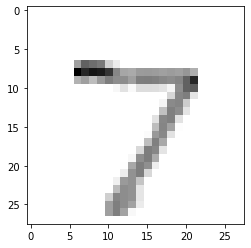

In [55]:
print(probs[0], " => ", preds[0])
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()